In [4]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [6]:
train_path = 'Data/Training_data'
valid_path = 'Data/Testing_Data'

In [7]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 7s 0us/step


In [8]:
# don't train existing weights
for layer in vgg.layers:  
    layer.trainable = False

In [10]:
# useful for getting number of classes
folders = glob('Data/Training_data/*')
len(folders)

3

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [13]:
# create a model object
model = Model(inputs = vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Data/Training_data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Data/Testing_Data',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data = test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps= len(test_set)
)

Epoch 1/20
 5/19 [======>.......................] - ETA: 38s - loss: 0.8770 - accuracy: 0.6000

C:\Users\Admin\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 65s 3s/step - loss: 0.4175 - accuracy: 0.8167 - val_loss: 0.1613 - val_accuracy: 0.9400
Epoch 2/20
19/19 [==============================] - 66s 3s/step - loss: 0.1037 - accuracy: 0.9700 - val_loss: 0.0949 - val_accuracy: 0.9600
Epoch 3/20
19/19 [==============================] - 64s 3s/step - loss: 0.0578 - accuracy: 0.9817 - val_loss: 0.0559 - val_accuracy: 0.9800
Epoch 4/20
19/19 [==============================] - 72s 4s/step - loss: 0.0386 - accuracy: 0.9900 - val_loss: 0.0540 - val_accuracy: 0.9867
Epoch 5/20
19/19 [==============================] - 66s 3s/step - loss: 0.0419 - accuracy: 0.9850 - val_loss: 0.0520 - val_accuracy: 0.9867
Epoch 6/20
19/19 [==============================] - 66s 3s/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0834 - val_accuracy: 0.9600
Epoch 7/20
19/19 [==============================] - 69s 4s/step - loss: 0.0445 - accuracy: 0.9817 - val_loss: 0.0511 - val_accuracy: 0.9867
Epoch 8/20
19/19 [=============

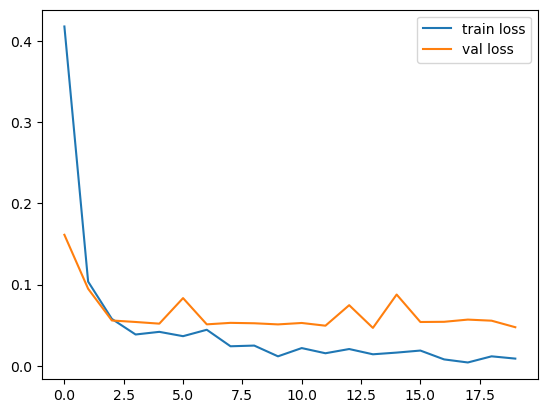

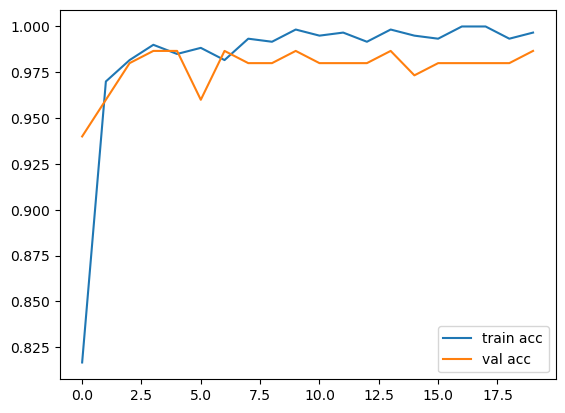

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model.h5')